In [52]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [62]:
host = 'http://localhost:8000/'

In [40]:
data = {'username': 'admin', 'password': 'adminpassword'}
r = requests.post(url=f"{host}api-token-auth/", json=data)
token = r.json()['token']

In [41]:
headers = {'Authorization': f'Token {token}'}
r = requests.get(url=f'{host}api/v1/timeseries/2', headers=headers)

In [42]:
data_points = r.json()['data_points']

In [43]:
df = pd.DataFrame(data_points)
df = df[['time_stamp', 'value']].set_index('time_stamp')

In [54]:
df.index[0]

'2015-05-08T00:00:00Z'

([<matplotlib.axis.XTick at 0x7fa9d2138050>,
 <a list of 19 Text xticklabel objects>)

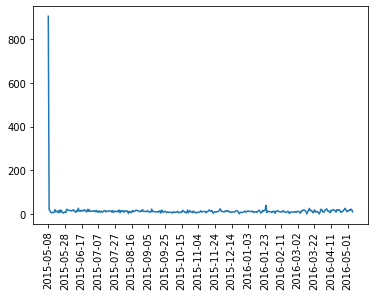

In [60]:
plt.plot(df.index, df['value'])
plt.xticks(ticks=[ind for (i, ind) in enumerate(df.index) if i % 20 == 0]
, labels=[ind[0:10] for (i, ind) in enumerate(df.index) if i % 20 == 0], rotation=90)